# DATA SCIENCE INTERN
# TASK-3
# PROJECT : MUSIC RECOMMENDATION

## Importing Libraries & Dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import requests 
import ydata_profiling
import plotly
import sklearn
import plotly.express as px
import plotly.offline as pyo
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from jupyter_datatables import init_datatables_mode
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline
import pickle
import os

## READ CSV FILE USING PANDAS

In [2]:
movies=pd.read_csv("C:\\Users\\user\\Downloads\\movie.csv")

In [3]:
movies.head()
     

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

# Data Cleaning
Data Cleaning is one of the important steps without which data will be of no use because the raw data contains a lot of noises that must be removed else the observations made from it will be inaccurate and if we are building a model upon it then it’s performance will be poor as well. Steps included in the data cleaning are outlier removal, null value imputation, and fixing the skewness of the data.

In [4]:
movies.shape

(4803, 20)

In [5]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
movies["keywords"][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [7]:
movies["tagline"][0]

'Enter the World of Pandora.'

In [8]:
movies["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

# CREATING THE REPORT

In [9]:
#Output the report

import pandas_profiling as p
p.ProfileReport(movies)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

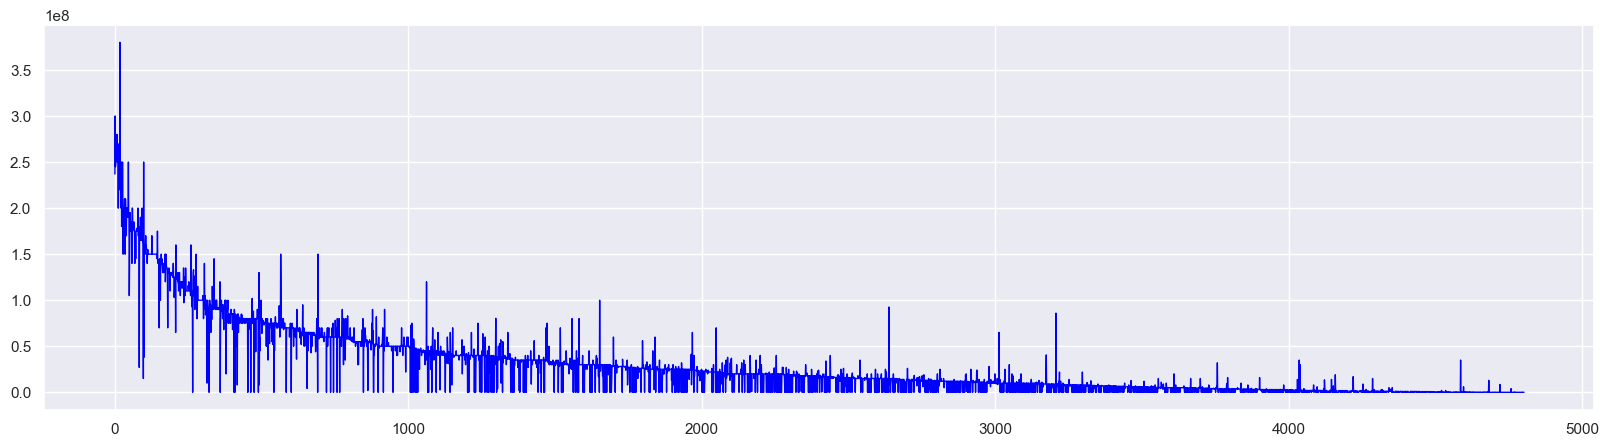

In [10]:
sns.set(rc = {'figure.figsize': (20, 5)})
movies['budget'].plot(linewidth = 1,color='blue')

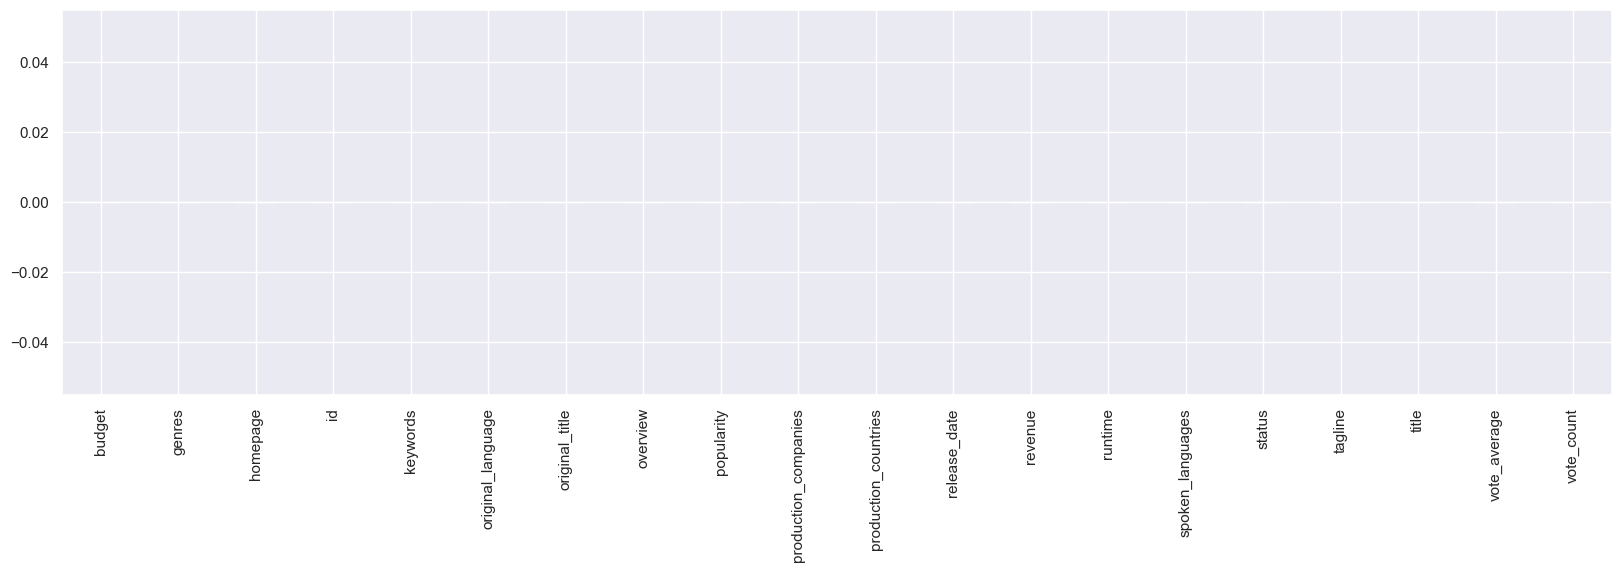

In [11]:
movies.dropna(inplace = True)
movies.isnull().sum().plot.bar()
plt.show()

# HEATMAP

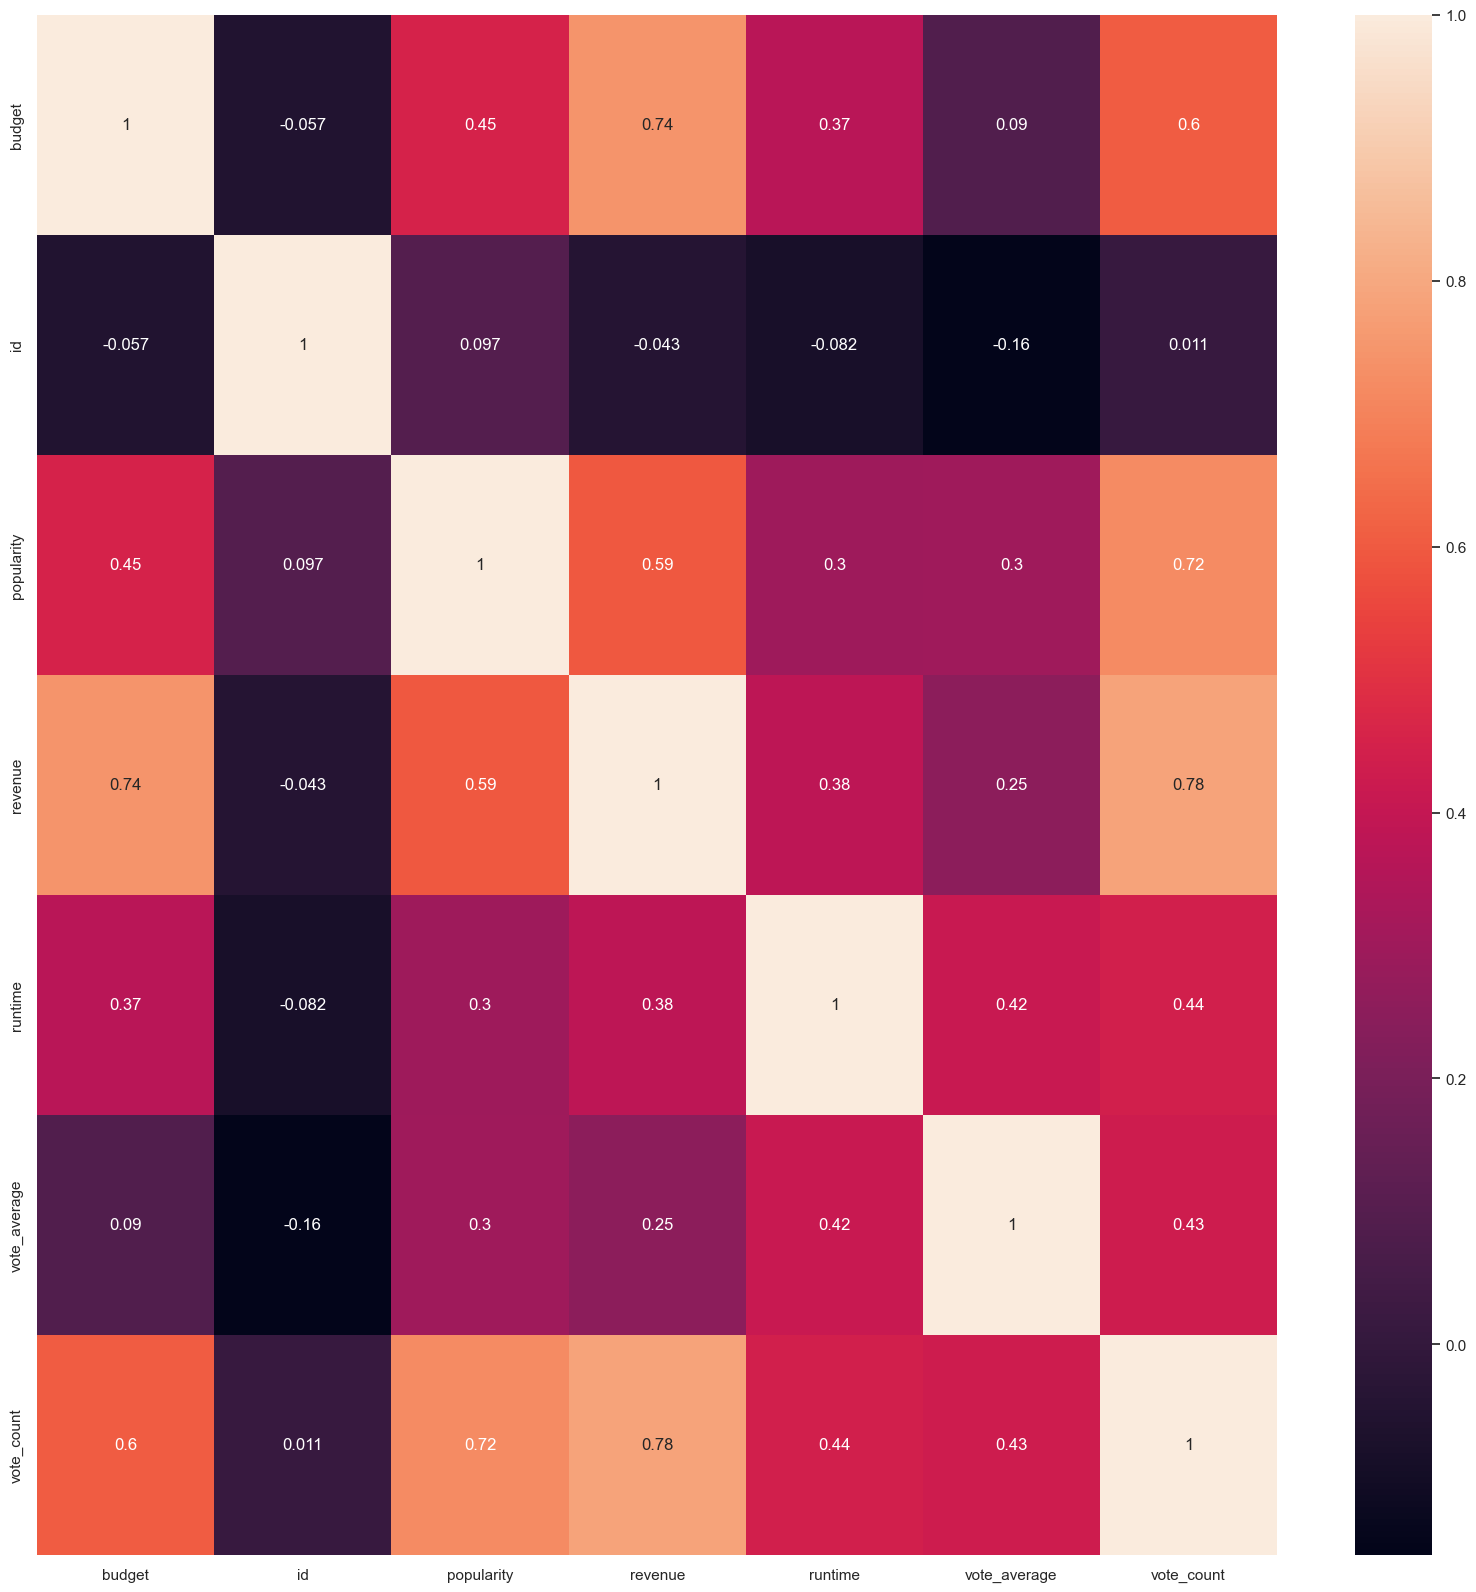

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(movies.corr(),annot=True)
plt.show()

# AUTO EDA

## SCATTER PLOT

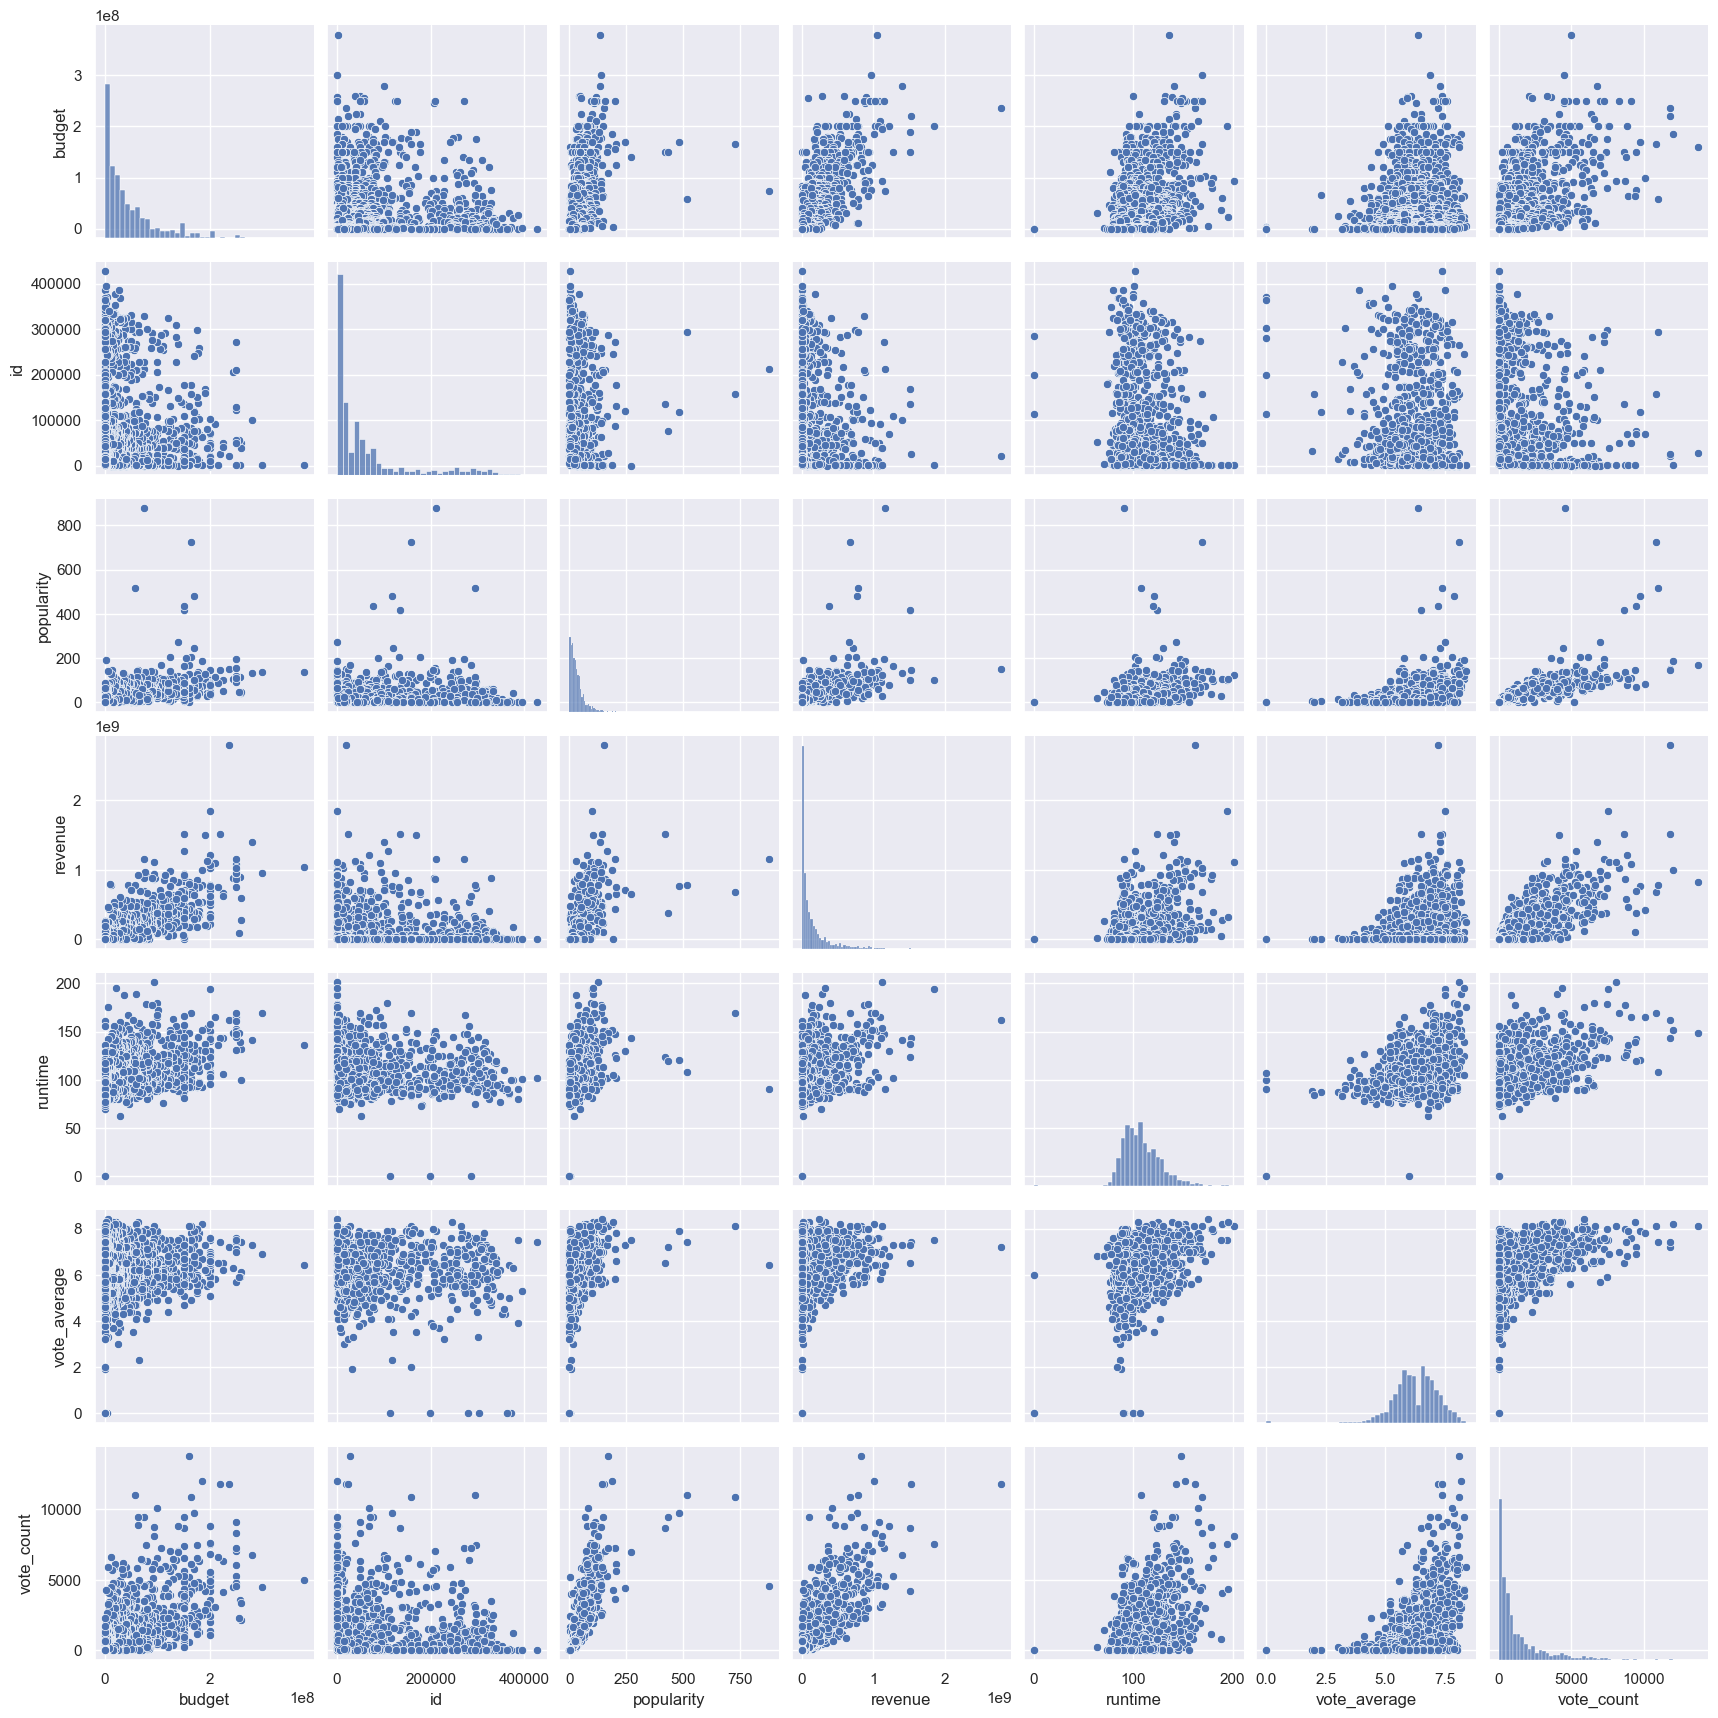

In [13]:
sns.pairplot(movies.iloc[:,:])

In [14]:
df2=pd.read_csv("C:\\Users\\user\\Downloads\\movie_credit.csv")
     

In [15]:

df2.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [16]:
df2["cast"]

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4798    [{"cast_id": 1, "character": "El Mariachi", "c...
4799    [{"cast_id": 1, "character": "Buzzy", "credit_...
4800    [{"cast_id": 8, "character": "Oliver O\u2019To...
4801    [{"cast_id": 3, "character": "Sam", "credit_id...
4802    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4803, dtype: object

# Merging two csv file on the basic of common feature that is "TITLE"

In [17]:
movies=movies.merge(df2,on="title")

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 1493
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1494 non-null   int64  
 1   genres                1494 non-null   object 
 2   homepage              1494 non-null   object 
 3   id                    1494 non-null   int64  
 4   keywords              1494 non-null   object 
 5   original_language     1494 non-null   object 
 6   original_title        1494 non-null   object 
 7   overview              1494 non-null   object 
 8   popularity            1494 non-null   float64
 9   production_companies  1494 non-null   object 
 10  production_countries  1494 non-null   object 
 11  release_date          1494 non-null   object 
 12  revenue               1494 non-null   int64  
 13  runtime               1494 non-null   float64
 14  spoken_languages      1494 non-null   object 
 15  status               

# Convert list of string to proper list with finding name

In [19]:
import ast
def str_list(x):
  x=ast.literal_eval(x)
  l=[]
  for item in x:

    l.append(item['name'])
  
  return l

In [20]:
movies["cast"]=movies["cast"].apply(str_list)

# Converting string of list to list with finding directors name as well

In [21]:
import ast
def str2_list(x):
  x=ast.literal_eval(x)
  l=[]
  for item in x:
    if item['job']=="Director":
      l.append(item['name'])
  
  return l

In [22]:
movies["crew"]=movies["crew"].apply(str2_list)

In [23]:
movies["cast"]

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
1489    [Brian O'Halloran, Jeff Anderson, Jason Mewes,...
1490    [Suzi Lorraine, Jared Degado, Heather Dorff, R...
1491    [Michael Parle, Emma Eliza Regan, Patrick O'Do...
1492    [Shane Carruth, David Sullivan, Casey Gooden, ...
1493    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
Name: cast, Length: 1494, dtype: object

In [24]:
movies["crew"]

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
1489          [Kevin Smith]
1490         [Travis Legge]
1491        [Ivan Kavanagh]
1492        [Shane Carruth]
1493          [Daniel Hsia]
Name: crew, Length: 1494, dtype: object

In [25]:
movies["genres"]=movies['genres'].apply(str_list)
movies["keywords"]=movies['keywords'].apply(str_list)
     

In [26]:
# finding NA values

In [27]:
movies.isna().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

In [28]:
movies.sample(5)

budget                                             genres  \
607   15000000                 [Horror, Mystery, Science Fiction]   
224   95000000                               [Adventure, Fantasy]   
1442    500000                 [Drama, Thriller, Science Fiction]   
800   25000000                                       [Drama, War]   
510   47000000  [Animation, Comedy, Family, Fantasy, Science F...   

                                               homepage     id  \
607   http://www.theofficialjohncarpenter.com/the-th...   1091   
224                     http://www.seventhsonmovie.com/  68737   
1442                       http://www.monstersfilm.com/  43933   
800                       http://www.stoplossmovie.com/   8988   
510            http://www.happilyneverafterthefilm.com/   5393   

                                               keywords original_language  \
607   [ice, space marine, paranoia, snow storm, norw...                en   
224   [magic, chosen one, dark fantasy, witch hunter...                en   
1442  [monster, pyramid, radio, dystopia, infection,...                en   
800   [post traumatic stress  disorder, iraq war vet...                en   
510   [dwarves, cinderella, wolf, bad mother-in-law,...                en   

            original_title                                           overview  \
607              The Thing  Scientists in the Antarctic are confronted by ...   
224            Seventh Son  John Gregory, who is a seventh son of a sevent...   
1442              Monsters  Six years ago NASA discovered the possibility ...   
800              Stop-Loss  A veteran soldier returns from his completed t...   
510   Happily N'Ever After  An alliance of evil-doers, led by Frieda, look...   

      popularity                               production_companies  ...  \
607    52.731379  [{"name": "Universal Pictures", "id": 33}, {"n...  ...   
224    63.628459  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   
1442   26.406001     [{"name": "Vertigo Entertainment", "id": 829}]  ...   
800     4.002579  [{"name": "Paramount Pictures", "id": 4}, {"na...  ...   
510    10.410933  [{"name": "Vanguard Films", "id": 614}, {"name...  ...   

     runtime                                   spoken_languages    status  \
607    109.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
224    102.0           [{"iso_639_1": "en", "name": "English"}]  Released   
1442    94.0  [{"iso_639_1": "es", "name": "Espa\u00f1ol"}, ...  Released   
800    113.0           [{"iso_639_1": "en", "name": "English"}]  Released   
510     75.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                                tagline                 title  \
607                   Man is The Warmest Place to Hide.             The Thing   
224   When darkness falls, the son will rise. When t...           Seventh Son   
1442  After Six Years, They're No Longer Aliens. The...              Monsters   
800   The bravest place to stand is by each other's ...             Stop-Loss   
510      Fairy Tale Endings Aren't What They Used To Be  Happily N'Ever After   

     vote_average vote_count movie_id  \
607           7.8       1588     1091   
224           5.2        957    68737   
1442          6.2        587    43933   
800           6.1         82     8988   
510           4.6        104     5393   

                                                   cast  \
607   [Kurt Russell, Keith David, Wilford Brimley, D...   
224   [Jeff Bridges, Julianne Moore, Ben Barnes, Ali...   
1442  [Whitney Able, Scoot McNairy, Annalee Jefferie...   
800   [Ryan Phillippe, Abbie Cornish, Joseph Gordon-...   
510   [George Carlin, Andy Dick, Sarah Michelle Gell...   

                                            crew  
607                             [John Carpenter]  
224                              [Sergei Bodrov]  
1442                            [Gareth Edwards]  
800                            [K

In [29]:
# removing space 
def _join(x):
  l=[]
  for i in x:
    l.append(i.replace(" ",""))
  return l

In [30]:
movies["cast"]=movies["cast"].apply(_join)



In [31]:
movies["cast"]=movies["cast"].apply(lambda i:i[0:3])

In [32]:
movies["cast"]

0          [SamWorthington, ZoeSaldana, SigourneyWeaver]
1             [JohnnyDepp, OrlandoBloom, KeiraKnightley]
2              [DanielCraig, ChristophWaltz, LéaSeydoux]
3              [ChristianBale, MichaelCaine, GaryOldman]
4            [TaylorKitsch, LynnCollins, SamanthaMorton]
                              ...                       
1489         [BrianO'Halloran, JeffAnderson, JasonMewes]
1490           [SuziLorraine, JaredDegado, HeatherDorff]
1491    [MichaelParle, EmmaElizaRegan, PatrickO'Donnell]
1492          [ShaneCarruth, DavidSullivan, CaseyGooden]
1493              [DanielHenney, ElizaCoupe, BillPaxton]
Name: cast, Length: 1494, dtype: object

# we want

### 1.genres 2.key words 3.title 4. overview 5.cast (name) 6.crew(director name)

In [33]:
new_df=pd.DataFrame(movies,columns=['id','homepage','title','cast','crew','overview','genres','keywords'])
     

In [34]:
new_df.head(5)

id                                      homepage  \
0   19995                   http://www.avatarmovie.com/   
1     285  http://disney.go.com/disneypictures/pirates/   
2  206647   http://www.sonypictures.com/movies/spectre/   
3   49026            http://www.thedarkknightrises.com/   
4   49529          http://movies.disney.com/john-carter   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            cast                 crew  \
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]      [James Cameron]   
1     [JohnnyDepp, OrlandoBloom, KeiraKnightley]     [Gore Verbinski]   
2      [DanielCraig, ChristophWaltz, LéaSeydoux]         [Sam Mendes]   
3      [ChristianBale, MichaelCaine, GaryOldman]  [Christopher Nolan]   
4    [TaylorKitsch, LynnCollins, SamanthaMorton]     [Andrew Stanton]   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                            keywords  
0  [culture clash, future, space war, space colon...  
1  [ocean, drug abuse, exotic island, east india ...  
2  [spy, based on novel, secret agent, sequel, mi...  
3  [dc comics, crime fighter, terrorist, secret i...  
4  [based on novel, mars, medallion, space travel...

In [35]:
new_df['crew']=new_df['crew'].apply(_join)

In [36]:
new_df.head()
     

id                                      homepage  \
0   19995                   http://www.avatarmovie.com/   
1     285  http://disney.go.com/disneypictures/pirates/   
2  206647   http://www.sonypictures.com/movies/spectre/   
3   49026            http://www.thedarkknightrises.com/   
4   49529          http://movies.disney.com/john-carter   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            cast                crew  \
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]      [JamesCameron]   
1     [JohnnyDepp, OrlandoBloom, KeiraKnightley]     [GoreVerbinski]   
2      [DanielCraig, ChristophWaltz, LéaSeydoux]         [SamMendes]   
3      [ChristianBale, MichaelCaine, GaryOldman]  [ChristopherNolan]   
4    [TaylorKitsch, LynnCollins, SamanthaMorton]     [AndrewStanton]   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                            keywords  
0  [culture clash, future, space war, space colon...  
1  [ocean, drug abuse, exotic island, east india ...  
2  [spy, based on novel, secret agent, sequel, mi...  
3  [dc comics, crime fighter, terrorist, secret i...  
4  [based on novel, mars, medallion, space travel...

In [37]:
new_df.isna().sum()

id          0
homepage    0
title       0
cast        0
crew        0
overview    0
genres      0
keywords    0
dtype: int64

In [38]:
new_df["homepage"]=new_df["homepage"].fillna(0)
     

In [39]:
url=list(enumerate(new_df["homepage"]))
new_df["urls"]=0
for i in range(len(url)):
  if new_df["homepage"][i]==0:
    
    x=("{}/{}".format("https://www.",str("".join(list(new_df["title"][url[i][0]].split())))))

    new_df["urls"][i]=x
  else:
    new_df["urls"][i]=new_df["homepage"][i]
     

In [40]:
# def link(url,i):
#   s=url
#   x="{} + {}".format("https://www.",str(new_df.iloc[[url[i][0]]].title))
#   iF s is "link" 
#     return x
#   else:
#     return s
# # new_df[new_df["homepage"].fillna("{} + {}".format("https://www.",new_df["title"]]))
new_df["urls"]

0                        http://www.avatarmovie.com/
1       http://disney.go.com/disneypictures/pirates/
2        http://www.sonypictures.com/movies/spectre/
3                 http://www.thedarkknightrises.com/
4               http://movies.disney.com/john-carter
                            ...                     
1489            http://www.miramax.com/movie/clerks/
1490          https://www.facebook.com/DrySpellMovie
1491                   http://tincanmanthemovie.com/
1492                      http://www.primermovie.com
1493                     http://shanghaicalling.com/
Name: urls, Length: 1494, dtype: object

In [41]:
# new_df.iloc[[0]].title
new_df.sample(5)

id                                      homepage         title  \
612    23168           http://thetownmovie.warnerbros.com/      The Town   
1314   84174   https://www.facebook.com/bachelorettemovie/  Bachelorette   
1118   13201    http://www.mgm.com/sites/deuceswild/intro/   Deuces Wild   
1284  257087        http://www.blumhouse.com/tag/the-veil/      The Veil   
415    16866  http://www.sonypictures.com/movies/planet51/     Planet 51   

                                                 cast  \
612           [BenAffleck, RebeccaHall, JeremyRenner]   
1314          [KirstenDunst, IslaFisher, LizzyCaplan]   
1118          [StephenDorff, FairuzaBalk, BradRenfro]   
1284              [JessicaAlba, ThomasJane, LilyRabe]   
415   [DwayneJohnson, SeannWilliamScott, JessicaBiel]   

                                           crew  \
612                                [BenAffleck]   
1314                           [LeslyeHeadland]   
1118                             [ScottKalvert]   
1284                               [PhilJoanou]   
415   [JorgeBlanco, JavierAbad, MarcosMartínez]   

                                               overview  \
612   Doug MacRay is a longtime thief, who, smarter ...   
1314  Three friends are asked to be bridesmaids at a...   
1118  1950s New York City. A bad and bloody gang war...   
1284  The story springs from the real-world headline...   
415   When Earth astronaut Capt. Chuck Baker arrives...   

                                                 genres  \
612                            [Crime, Drama, Thriller]   
1314                                  [Comedy, Romance]   
1118                    [Action, Crime, Drama, Romance]   
1284                                           [Horror]   
415   [Science Fiction, Animation, Family, Comedy, A...   

                                               keywords  \
612   [based on novel, money laundering, ambulance, ...   
1314  [bridesmaid, strip club, female friendship, re...   
1118               [gang, new york city, drug overdose]   
1284                                             [cult]   
415   [flying saucer, alien life-form, spaceship, al...   

                                              urls  
612            http://thetownmovie.warnerbros.com/  
1314   https://www.facebook.com/bachelorettemovie/  
1118    http://www.mgm.com/sites/deuceswild/intro/  
1284        http://www.blumhouse.com/tag/the-veil/  
415   http://www.sonypictures.com/movies/planet51/

In [42]:
# to convert string into list of strings 
def spliting(text):
  text=str(text).split()
  return text
     

In [43]:
new_df['overview']=new_df['overview'].apply(spliting)
     

In [44]:
new_df['all_tags']=new_df['overview'] + new_df['genres'] + new_df['keywords'] + new_df['cast'] + new_df['crew']
     

In [45]:
new_df.drop(columns=['overview','genres' ,'keywords','cast' , 'crew','homepage'],inplace=True)
    

In [46]:
new_df.head()

id                                     title  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                           urls  \
0                   http://www.avatarmovie.com/   
1  http://disney.go.com/disneypictures/pirates/   
2   http://www.sonypictures.com/movies/spectre/   
3            http://www.thedarkknightrises.com/   
4          http://movies.disney.com/john-carter   

                                            all_tags  
0  [In, the, 22nd, century,, a, paraplegic, Marin...  
1  [Captain, Barbossa,, long, believed, to, be, d...  
2  [A, cryptic, message, from, Bond’s, past, send...  
3  [Following, the, death, of, District, Attorney...  
4  [John, Carter, is, a, war-weary,, former, mili...

In [47]:
#converting all tags in lower case and deletion similarities
     

In [48]:
def convert_lower(text):
  l=[]
  for item in text:
    l.append(item.lower())
  return l
    

In [49]:
new_df['all_tags']=new_df['all_tags'].apply(convert_lower)
     


In [50]:
new_df.head()

id                                     title  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                           urls  \
0                   http://www.avatarmovie.com/   
1  http://disney.go.com/disneypictures/pirates/   
2   http://www.sonypictures.com/movies/spectre/   
3            http://www.thedarkknightrises.com/   
4          http://movies.disney.com/john-carter   

                                            all_tags  
0  [in, the, 22nd, century,, a, paraplegic, marin...  
1  [captain, barbossa,, long, believed, to, be, d...  
2  [a, cryptic, message, from, bond’s, past, send...  
3  [following, the, death, of, district, attorney...  
4  [john, carter, is, a, war-weary,, former, mili...

In [51]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def steming(text):
  l=[]
  for i in text:

    l.append(ps.stem(i))
  return l

In [52]:
new_df['all_tags']=new_df['all_tags'].apply(steming)

In [53]:
new_df.sample(5)

id                    title  \
958    4723          Southland Tales   
813   20697          Ready to Rumble   
933   19840  I Love You, Beth Cooper   
54      155          The Dark Knight   
1307  41436    Paranormal Activity 2   

                                                urls  \
958        http://darko.com/film_southlandtales.html   
813   http://readytorumble.warnerbros.com/flash.html   
933          http://www.iloveyoubethcoopermovie.com/   
54      http://thedarkknight.warnerbros.com/dvdsite/   
1307         http://www.paranormalmovie.com/trailer/   

                                               all_tags  
958   [set, in, the, futurist, landscap, of, lo, ang...  
813   [two, slacker, wrestl, fan, are, devast, by, t...  
933   [nerdi, teenag, deni, cooverman, (paul, rust),...  
54    [batman, rais, the, stake, in, hi, war, on, cr...  
1307  [just, as, dan, and, kristi, welcom, a, newbor...

In [54]:
new_df["all_tags"]=new_df["all_tags"].apply(_join)

In [55]:
new_df['all_tags'] = new_df['all_tags'].apply(lambda x: " ".join(x))

# Vectorization

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [57]:
data = cv.fit_transform(new_df['all_tags']).toarray()
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(data)
similarity

array([[1.        , 0.06776309, 0.06862635, ..., 0.        , 0.040008  ,
        0.        ],
       [0.06776309, 1.        , 0.05063697, ..., 0.02752409, 0.02214037,
        0.        ],
       [0.06862635, 0.05063697, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02752409, 0.        , ..., 1.        , 0.        ,
        0.16140004],
       [0.040008  , 0.02214037, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16140004, 0.        ,
        1.        ]])

In [59]:
def movie_recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:8]:

      
      print("{} {}".format(new_df.iloc[i[0]].title,new_df.iloc[i[0]].urls))

In [60]:
movie_recommend("Avatar")

Aliens vs Predator: Requiem http://www.avp-r.com/
Battle: Los Angeles http://www.battlela.com
Meet Dave http://www.meetdavemovie.com/
Jupiter Ascending http://www.jupiterascending.com
Edge of Tomorrow http://www.edgeoftomorrowmovie.com/
Apollo 18 http://apollo18movie.net/
Attack the Block http://attacktheblock.com/


In [62]:
movie_recommend("2016: Obama's America")

Captain America: The Winter Soldier http://www.captainamericathewintersoldiermovie.com
Bowling for Columbine http://www.bowlingforcolumbine.com/index.php
Captain America: The First Avenger http://captainamerica.marvel.com/
Team America: World Police http://www.teamamerica.com
Our Brand Is Crisis http://www.ourbrandiscrisismovie.com/
Captain America: Civil War http://marvel.com/captainamericapremiere
Gangs of New York http://video.movies.go.com/gangsofnewyork/


In [63]:
import pickle

In [64]:
pickle.dump(new_df,open("movie_recm.pkl","wb"))
pickle.dump(similarity,open("similarity.pkl","wb"))

In [65]:
np.array(new_df["title"])

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Tin Can Man', 'Primer', 'Shanghai Calling'], dtype=object)